## Packages

In [1]:
#Packages to use
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns
color = sns.color_palette()
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#ignore annoying warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

#Limits floats to 3 decimals
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

## DATA

In [43]:
url = 'C:/Users/James.Kelly/OneDrive - insidemedia.net/Documents/final_project_data.csv'
df = pd.read_csv(url, index_col='Week', parse_dates=True)
df['quarter'] = df.index.quarter
df['month'] = df.index.month

df.head()

,Stock,Category_SPEND,Category_GRP,BDC_SPEND,BDC_GRP,BDC_SOS,BDC_SOV,Google_index,Twitter_mentions,Twitter_sentiment,...,Ad_awareness,WOM,Consideration,Purchase_Intent,Recent_users,Article_Count,Article_Engagement,Article_Sentiment,quarter,month
Week,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1476.910,9382,389,0,0,0.000,0.000,57,529,-0.729,...,4.842,1.389,8.801,2.395,3.502,89,4.718,4.235,1,1
2017-01-08,1518.000,14874,612,0,0,0.000,0.000,54,594,0.963,...,5.723,1.696,8.860,2.461,3.187,70,0.000,4.869,1,1
2017-01-15,1544.000,14780,694,0,0,0.000,0.000,56,653,3.597,...,5.294,1.333,9.254,0.845,1.296,69,4.812,7.945,1,1
2017-01-22,1541.470,13325,604,0,0,0.000,0.000,54,597,1.554,...,5.722,2.334,11.312,2.813,4.933,69,5.935,6.864,1,1
2017-01-29,1598.650,18675,655,0,0,0.000,0.000,56,536,2.107,...,5.404,3.405,9.966,2.224,2.793,4,0.693,4.340,1,1


In [30]:
df.isnull().sum().sum()

0

In [48]:
#df['Stock'] = df[['Stock', 'BDC_SOS', 'BDC_SOV']].astype(float)
df.dtypes

Stock                 float64
Category_SPEND          int64
Category_GRP            int64
BDC_SPEND               int64
BDC_GRP                 int64
BDC_SOS               float64
BDC_SOV               float64
Google_index            int64
Twitter_mentions        int64
Twitter_sentiment     float64
Twitter_Anger           int64
Twitter_Fear            int64
Twitter_Disgust         int64
Twitter_Joy             int64
Twitter_Surprise        int64
Twitter_Sadness         int64
Buzz                  float64
Attention             float64
Impression            float64
Quality               float64
Value                 float64
Reputation            float64
Satisfaction          float64
Recommend             float64
Awareness             float64
Ad_awareness          float64
WOM                   float64
Consideration         float64
Purchase_Intent       float64
Recent_users          float64
Article_Count           int64
Article_Engagement    float64
Article_Sentiment     float64
quarter   

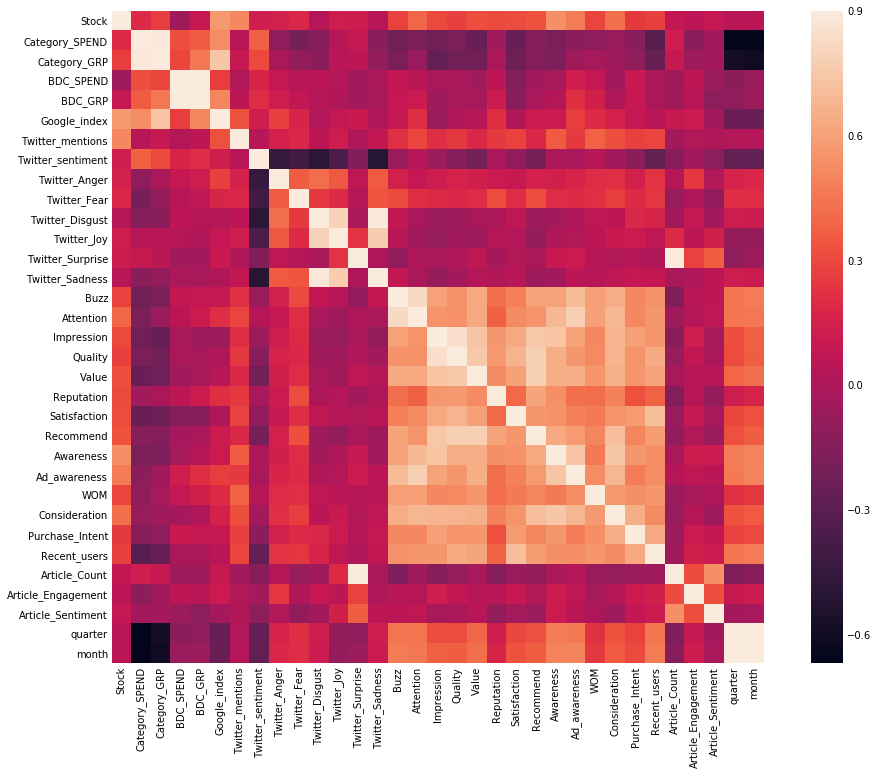

In [31]:
corrmat = df.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [ ]:
#all_data.drop(['SalePrice'], axis=1, inplace=True)
#all_data.head()

# Variable Selection


In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

In [61]:
# create x and y columns
X = df.loc[:, df.columns != 'Consideration']
y = df['Consideration']
# create dummy variables
#X = pd.get_dummies(X)

In [62]:
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [63]:
importances = pd.DataFrame({
    'Features': X.columns,
    'Importance': rf.feature_importances_
})

importances.sort_values(by=['Importance'],ascending=False)

,Features,Importance
24,Awareness,0.155
18,Impression,0.139
23,Recommend,0.096
25,Ad_awareness,0.083
17,Attention,0.077
19,Quality,0.061
27,Purchase_Intent,0.057
26,WOM,0.052
20,Value,0.050
16,Buzz,0.034


# Variable Selection
### Hierarchical Clustering & Dendrograms


In [68]:
vals_to_keep = importances['Features'][:33].values.tolist()

In [69]:
# standardize data
data_for_cluster = (X[vals_to_keep] - X[vals_to_keep].mean()) / X[vals_to_keep].std()

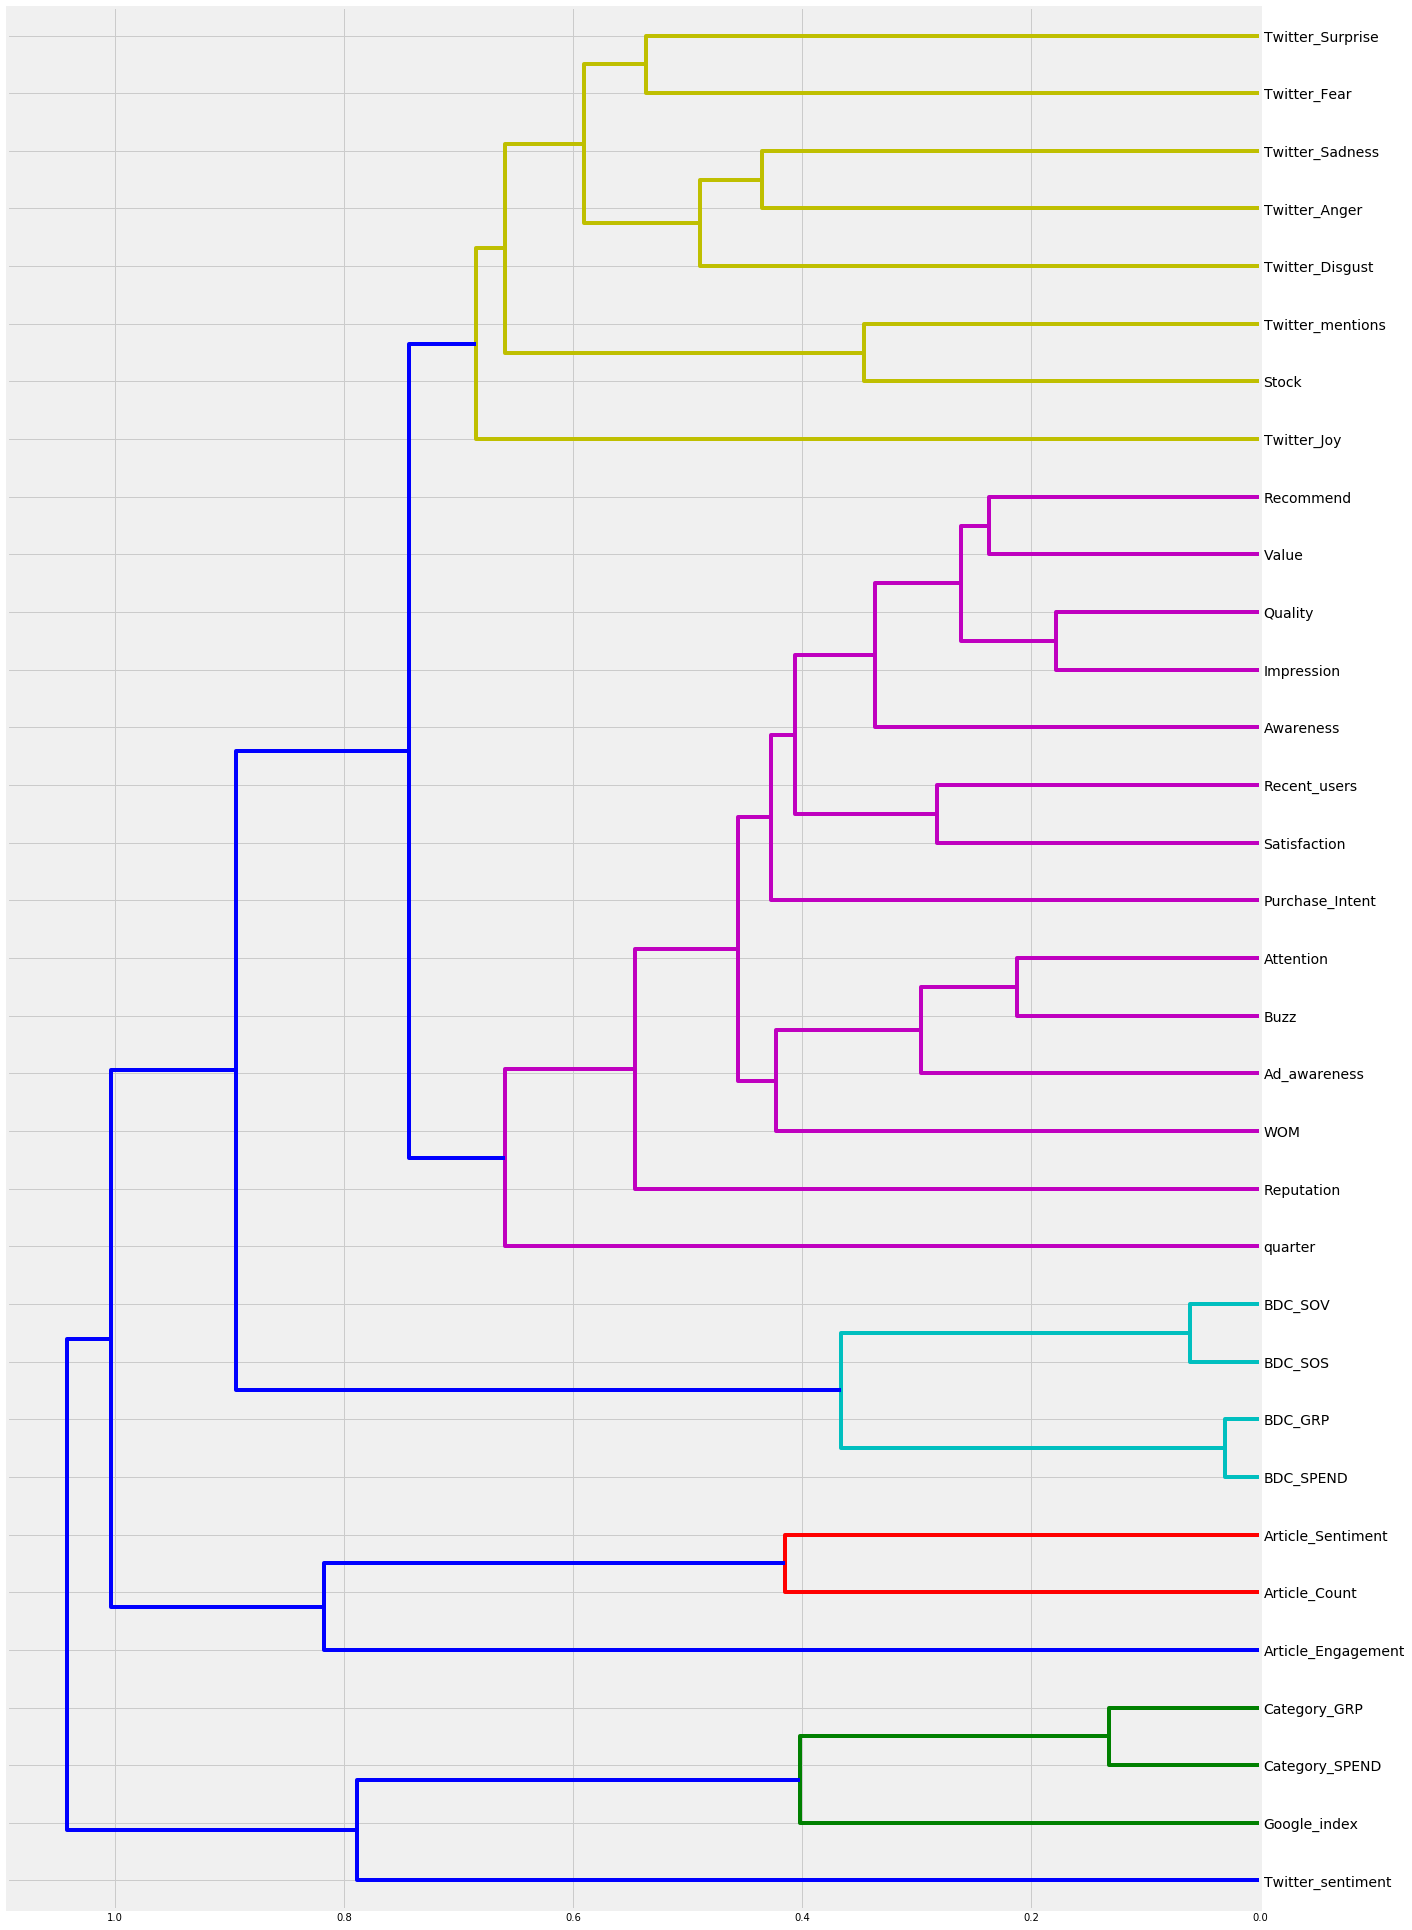

In [70]:
# create the dendrogram
from scipy.cluster import hierarchy as hc
from scipy.stats import spearmanr as sp
import matplotlib.pyplot as plt
%matplotlib inline

corr = np.round(sp(data_for_cluster).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(20,35))
dendrogram = hc.dendrogram(z, labels=vals_to_keep, orientation='left', leaf_font_size=14)
plt.show()

## Training and Test Sets

In [46]:
# create x and y columns
X = df.loc[:, df.columns != 'Consideration']
y = df['Consideration']

In [41]:
X_std = (X - X.mean()) / X.std()

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=17)

## Random Forest

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()